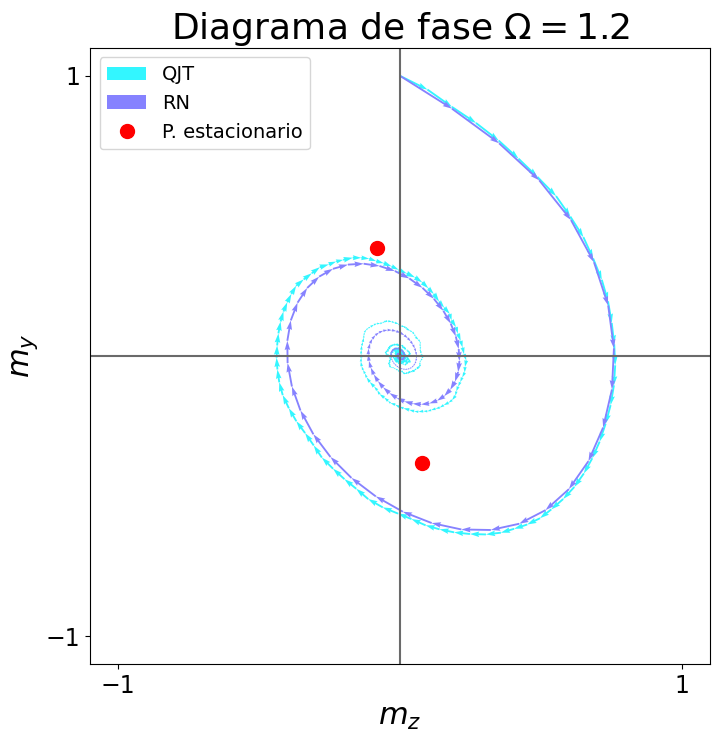

In [8]:
import numpy as np
import matplotlib.pyplot as plt


#Total de lineas que se van a utilizar para representar el fichero

Omega=1.2
patrones=11
qbits=6
beta=500

mz=np.genfromtxt("saltos/m_totalz.dat")[0:-1]
my=np.genfromtxt("saltos/m_totaly.dat")[0:-1]
mzabs=np.genfromtxt("saltos/m_totalz_abs.dat")[0:-1]
myabs=np.genfromtxt("saltos/m_totaly_abs.dat")[0:-1]
mzm=np.genfromtxt("saltos/m_totalz_menos.dat")[0:-1]
mym=np.genfromtxt("saltos/m_totaly_menos.dat")[0:-1]
mzT=np.genfromtxt("saltos/m_totalz_T.dat")[0:-1]
myT=np.genfromtxt("saltos/m_totaly_T.dat")[0:-1]

mdmz=np.genfromtxt("r_numerica/mzT.dat")[0:-1]
mdmy=np.genfromtxt("r_numerica/myT.dat")[0:-1]

total:int=mz.shape[0]
inicio=0

#Necesitamos generar ahora a los vectores que nos van a llevar  de un estado a otro para ello escogemos solo 10 puntos
filas=500
columnas=4


#Numero de divisines que cogemos para representar
particion:int=int(total/filas)


#Sacmos los puntos que vamos a representar
X=np.zeros((filas))
Y=np.zeros((filas))
Xm=np.zeros((filas))
Ym=np.zeros((filas))
XT=np.zeros((filas))
YT=np.zeros((filas))

mdX=np.zeros(filas)
mdY=np.zeros(filas)

for i in range(filas):
    X[i]=mz[particion*i]
    Y[i]=my[particion*i]
    Xm[i]=mzm[particion*i]
    Ym[i]=mym[particion*i]
    XT[i]=mzT[particion*i]
    YT[i]=myT[particion*i]

for i in range(filas):
    mdX[i]=mdmz[int(mdmz.shape[0]/filas)*i]
    mdY[i]=mdmy[int(mdmz.shape[0]/filas)*i]

#Calculamos los vectores directores de la red
u=X[1:filas]-X[0:filas-1]
v=Y[1:filas]-Y[0:filas-1]
um=Xm[1:filas]-Xm[0:filas-1]
vm=Ym[1:filas]-Ym[0:filas-1]
uT=XT[1:filas]-XT[0:filas-1]
vT=YT[1:filas]-YT[0:filas-1]
mdu=mdX[1:filas]-mdX[0:filas-1]
mdv=mdY[1:filas]-mdY[0:filas-1]


#Gradicamos el campo vectorial

plt.figure(1,figsize=(8,8))



colores=["#ff5733","#a833ff","#33f6ff","#ff33f3","#09893d","#9eae00","#8a7f2c","#8a2c2c","#502eac","#2eaca4","#aca82e","#2e5aac"]

plt.quiver(XT[0:filas-1],YT[0:filas-1],uT[:],vT[:],scale_units="xy",angles='xy',scale=1,color=colores[2],width=0.003,label="QJT")



plt.xlabel(r"$m_{z}$",fontsize=22)
plt.ylabel(r"$m_{y}$",fontsize=22)

plt.title(r"Diagrama de fase $\Omega="+str(Omega)+"$",fontsize=26)

plt.axvline(0.0,color="#6a6a6a")
plt.axhline(0.0,color="#6a6a6a")

plt.quiver(mdX[0:filas-1],mdY[0:filas-1],mdu[:],mdv[:],scale_units="xy",angles='xy',scale=1,color="#8682ff",width=0.003,label="RN")


if((1+8*Omega**2)<beta):
    plt.plot(1/(1+8.0*Omega**2),-4.0*Omega/(1+8.0*Omega**2),marker="o",markersize=10.0,linewidth=0.0,color="red",label="P. estacionario")
    plt.plot(-1/(1+8.0*Omega**2),4.0*Omega/(1+8.0*Omega**2),marker="o",markersize=10.0,linewidth=0.0,color="red")

ylim=1.1
xlim=1.1


#plt.rcParams.update({'legend.fontsize': 10})
plt.xticks([-1,1],fontsize=17)
plt.yticks([-1,1],fontsize=17)
plt.xlim(-ylim,ylim)
plt.ylim(-xlim,xlim)
plt.legend(loc="upper left",fontsize=14)

plt.savefig("diagrama_de_fases_omega_"+str(Omega)+".png",format="png")


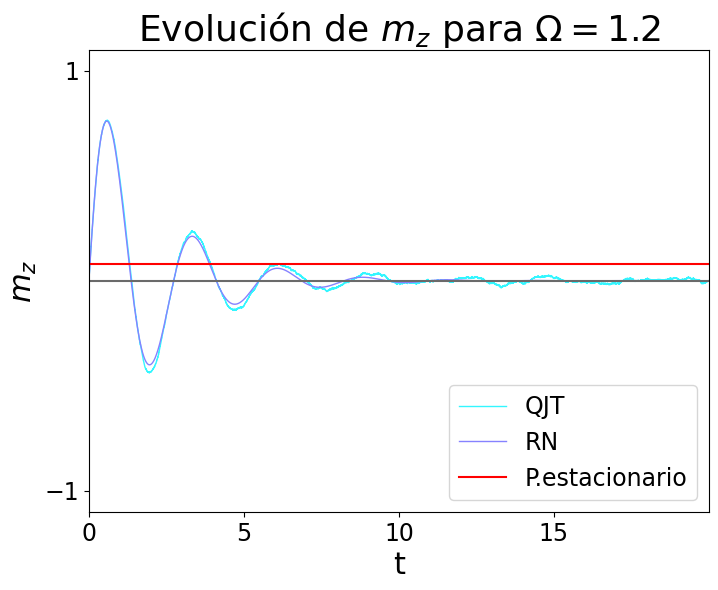

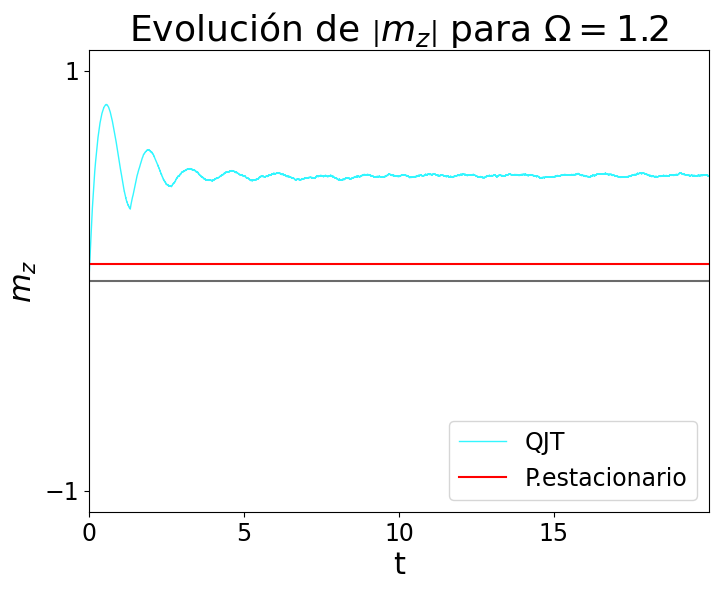

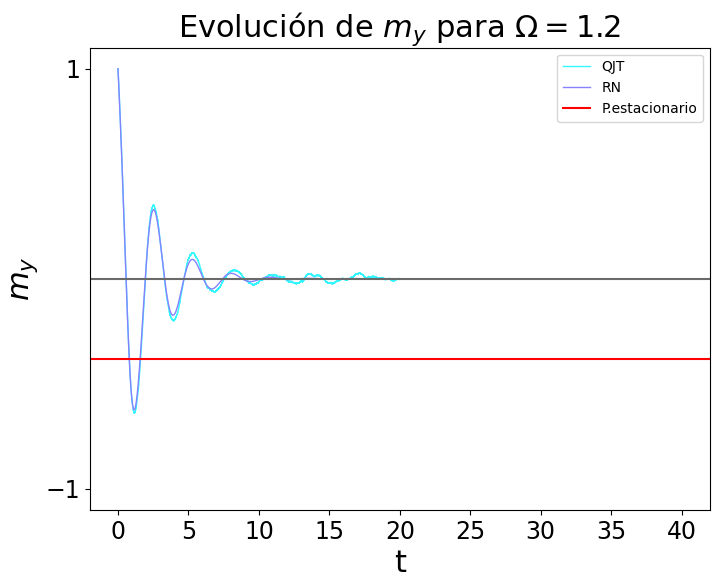

In [9]:
#Hacemos gráficas para estudiar la evolución temporal de la magenetización en el tiempo
t=np.arange(4*inicio,4*total,4)/10000
mdt=np.arange(4*inicio,4*mdmz.size,4)/10000
plt.figure(2,figsize=(8,6))
plt.title(r"Evolución de $m_{z}$ para $\Omega="+str(Omega)+"$",fontsize=26)

plt.xlabel(r"t",fontsize=22)
plt.ylabel(r"$m_{z}$",fontsize=22)

plt.xticks(np.arange(0,30,5),fontsize=17)
plt.yticks([-1,1],fontsize=17)

plt.plot(t,mzT[inicio:total],color=colores[2],linewidth=1.0,label="QJT")

plt.plot(mdt,mdmz,color="#8682ff",linewidth=1.0,label="RN")

plt.axhline(0.0,color="#6a6a6a")
plt.ylim(-1.1,1.1)
plt.xlim(0.0,t[-1])

if((1+8*Omega**2)<beta):
    plt.axhline(1/(1+8.0*Omega**2),color="red",label="P.estacionario")

plt.legend(loc="lower right",fontsize=17)



plt.savefig("mz_en_funcion_de_t_omega_"+str(Omega)+".png",format="png")


plt.figure(20,figsize=(8,6))
plt.title(r"Evolución de $\left |m_{z}\right |$ para $\Omega="+str(Omega)+"$",fontsize=26)

plt.xticks(np.arange(0,30,5),fontsize=17)
plt.yticks([-1,1],fontsize=17)

plt.xlabel(r"t",fontsize=22)
plt.ylabel(r"$m_{z}$",fontsize=22)
plt.xlim(0.0,t[-1])
plt.plot(t,mzabs[inicio:total],color=colores[2],linewidth=1.0,label="QJT")

plt.axhline(0.0,color="#6a6a6a")
plt.ylim(-1.1,1.1)

if((1+8*Omega**2)<beta):
    plt.axhline(1/(1+8.0*Omega**2),color="red",label="P.estacionario")







plt.legend(loc="lower right",fontsize=17)
plt.savefig("mz_abs_en_funcion_de_t_omega_"+str(Omega)+".png",format="png")
plt.figure(3,figsize=(8,6))

plt.title(r"Evolución de $m_{y}$ para $\Omega="+str(Omega)+"$",fontsize=22)
plt.xticks(fontsize=17)
plt.yticks([-1,1],fontsize=17)

plt.xlabel(r"t",fontsize=22)
plt.ylabel(r"$m_{y}$",fontsize=22)

plt.plot(t,myT[inicio:total],color=colores[2],linewidth=1.0,label="QJT")

plt.plot(mdt,mdmy,color="#8682ff",linewidth=1.0,label="RN")


plt.axhline(0.0,color="#6a6a6a")
plt.ylim(-1.1,1.1)
if((1+8*Omega**2)<beta):
    plt.axhline(-4.0*Omega/(1+8.0*Omega**2),color="red",label="P.estacionario")
plt.legend(loc="upper right",fontsize=10)



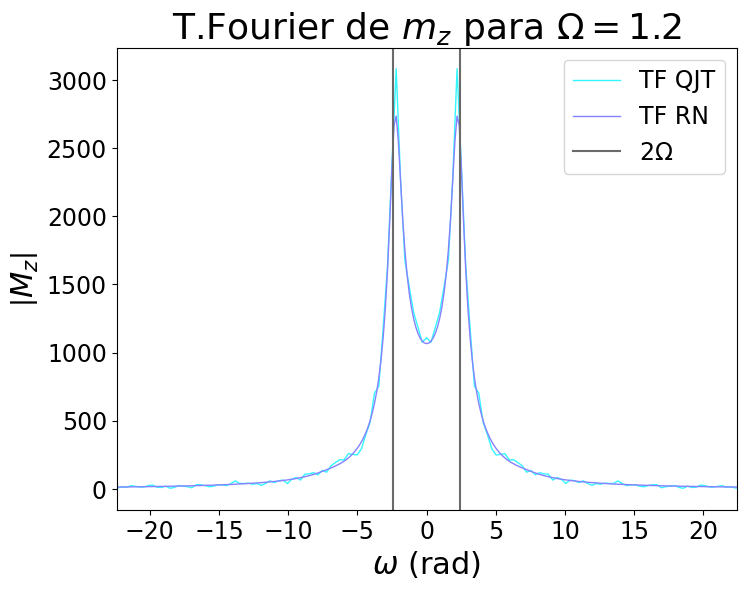

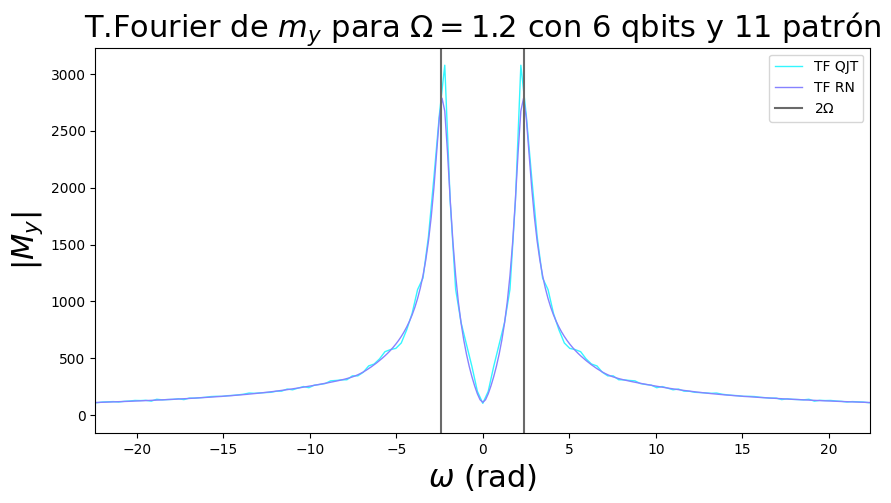

In [10]:
#Hacemos la transformada de Fourier
MzT=np.fft.fft(mzT,axis=0)
MyT=np.fft.fft(myT,axis=0)
Freq=np.fft.fftshift(np.fft.fftfreq(t.size,t[1]-t[0]))
mdFreq=np.fft.fftshift(np.fft.fftfreq(mdt.size,mdt[1]-mdt[0]))



plt.figure(8,figsize=(8,6))
plt.title(r"T.Fourier de $m_{z}$ para $\Omega="+str(Omega)+"$",fontsize=26)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.xlabel(r"$\omega$ (rad)",fontsize=22)
plt.ylabel(r"$\left|M_{z}\right|$",fontsize=22)

plt.xlim(-20-2*Omega,20+2*Omega)


plt.plot(2*np.pi*Freq,np.abs(np.fft.fftshift(MzT[inicio:total])),color=colores[2],linewidth=1.0,label="TF QJT")
plt.plot(2*np.pi*mdFreq,np.abs(np.fft.fftshift(np.fft.fft(mdmz))),color="#8682ff",linewidth=1.0,label="TF RN")

plt.axvline(2.0*Omega,color="#6a6a6a",label=r"$2\Omega$")
plt.axvline(-2.0*Omega,color="#6a6a6a")
plt.legend(loc="upper right",fontsize=17)

plt.savefig("TF_mz_omega_"+str(Omega)+".png",format="png")

plt.figure(9,figsize=(10,5))

plt.title(r"T.Fourier de $m_{y}$ para $\Omega="+str(Omega)+"$ con $"+str(qbits)+"$ qbits y "+str(patrones)+" patrón",fontsize=22)
plt.xlim(-20-2*Omega,20+2*Omega)

plt.xlabel(r"$\omega$ (rad)",fontsize=22)
plt.ylabel(r"$\left|M_{y}\right|$",fontsize=22)

plt.plot(2*np.pi*Freq,np.abs(np.fft.fftshift(MyT[inicio:total])),color=colores[2],linewidth=1.0,label="TF QJT")
plt.plot(2*np.pi*mdFreq,np.abs(np.fft.fftshift(np.fft.fft(mdmy))),color="#8682ff",linewidth=1.0,label="TF RN")

plt.axvline(2.0*Omega,color="#6a6a6a",label=r"$2\Omega$")
plt.axvline(-2.0*Omega,color="#6a6a6a")

plt.legend(loc="upper right",fontsize=10)
